# Eigen Decomposition and SVD Applications

https://github.com/mikexcohen/LinAlg4DataScience/blob/main/LA4DS_ch15.ipynb

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # for the subplots

import pandas as pd
import seaborn as sns

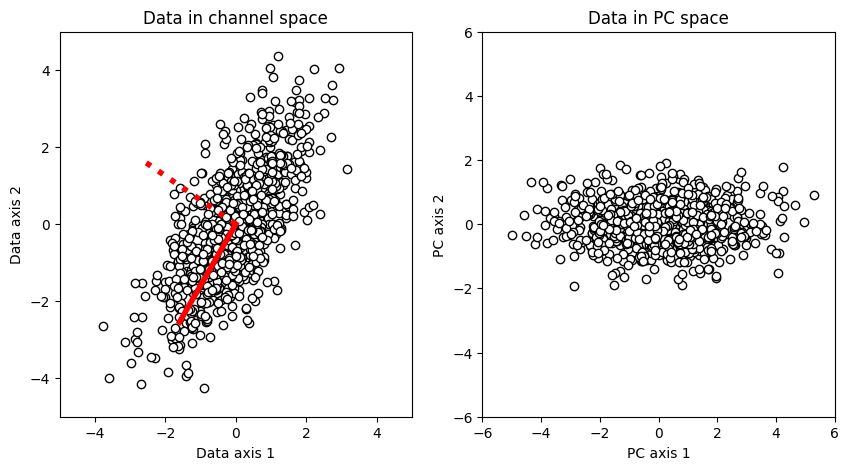

In [14]:
# Create some correlated data
X = np.random.randn(1000,2)
X[:,1] = np.sum(X,axis=1)

# quick PCA
evals,evecs = np.linalg.eig( np.cov(X.T,ddof=1) )
scores = X @ evecs

# show plot
_,axs = plt.subplots(1,2,figsize = (10,5))
axs[0].plot(X[:,0],X[:,1],'o',markeredgecolor='black',markerfacecolor='white')
axs[0].plot([0,3*evecs[0,1]],[0,3*evecs[1,1]],'r-',linewidth=4,label='PC1')
axs[0].plot([0,3*evecs[0,0]],[0,3*evecs[1,0]],'r:',linewidth=4,label='PC2')
axs[0].axis([-5,5,-5,5])
axs[0].set_xlabel('Data axis 1')
axs[0].set_ylabel('Data axis 2')
axs[0].set_title('Data in channel space')

axs[1].plot(scores[:,1],scores[:,0],'ko',markerfacecolor='w')
axs[1].set_xlabel('PC axis 1')
axs[1].set_ylabel('PC axis 2')
axs[1].axis([-6,6,-6,6])
axs[1].set_title('Data in PC space')

plt.show()